___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG</p>

### <font color= #2E9AFE> Tema: Modelos basados en Árboles Parte II - Clasificación</font>

### Bosques Aleatorios

"Los árboles tienen un sólo aspecto que previene que sean la herramienta ideal para el aprendizaje predictivo, que es la **inexactitud**" 

Pasos para crear un bosque aleatorio:
- Crear un dataset "bootstrapped"
- Crear un árbol de decisión usando el dataset "bootstrapped", pero sólo usar un subconjunto aleatorio de variables (o columnas) en cada paso. 
- Regresar al paso 1. y repetir 

Gracias al proceso de bootstrapping, el requerimento de dividir los datos en prueba y entrenamiento no es tan estricto. Se recomienda dividir los datos en prueba y entrenamiento cuando se quiere comparar su desempeño contra otros modelos. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.metrics import (accuracy_score,precision_score,recall_score)
import time

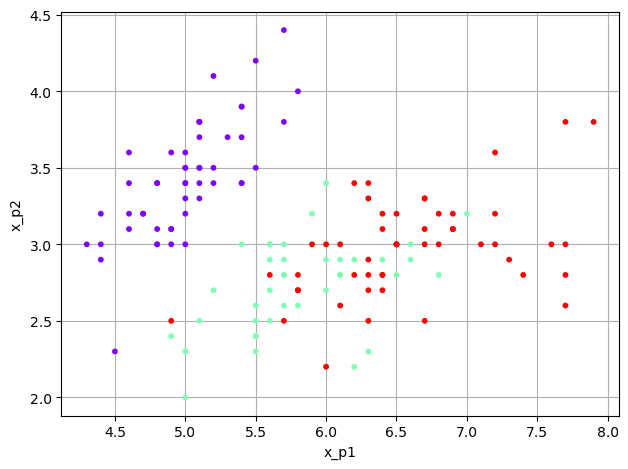

In [2]:
#Importar la base de datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target

plt.scatter(X[:,0],X[:,1], c=Y, s=10, cmap=plt.cm.rainbow,zorder=2)
plt.xlabel('x_p1')
plt.ylabel('x_p2')
plt.grid()
plt.tight_layout()
plt.show()

In [3]:
X.shape

(150, 4)

In [4]:
from sklearn.model_selection import train_test_split
#dividimos nuestros datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [5]:
#%% Construccion y entrenamiento de la bolsa de modelos
modelo = RandomForestClassifier(n_estimators=100,
                               criterion='gini',
                               max_depth=10,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=1)

start_time = time.time()
modelo = modelo.fit(X_train,y_train) # entrenamiento con la bolsa de modelos
print("--- %s seconds ---" % (time.time() - start_time))
Yhat = modelo.predict(X_test) #predicción con la bolsa de modelos

--- 0.12631869316101074 seconds ---


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [6]:
# Evaluacion del modelo
accu = accuracy_score(y_test,Yhat)
prec = precision_score(y_test,Yhat,average='weighted')
reca = recall_score(y_test,Yhat,average='weighted')
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 1.000	 1.000	 1.000


[Text(0.375, 0.9, 'x[3] <= 0.75\ngini = 0.643\nsamples = 72\nvalue = [42, 52, 26]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 25\nvalue = [42, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.444\nsamples = 47\nvalue = [0, 52, 26]'),
 Text(0.25, 0.5, 'x[3] <= 1.65\ngini = 0.109\nsamples = 28\nvalue = [0, 49, 3]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 43, 0]'),
 Text(0.375, 0.3, 'gini = 0.444\nsamples = 4\nvalue = [0, 6, 3]'),
 Text(0.75, 0.5, 'x[1] <= 3.05\ngini = 0.204\nsamples = 19\nvalue = [0, 3, 23]'),
 Text(0.625, 0.3, 'x[3] <= 1.75\ngini = 0.355\nsamples = 8\nvalue = [0, 3, 10]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 10]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 13]')]

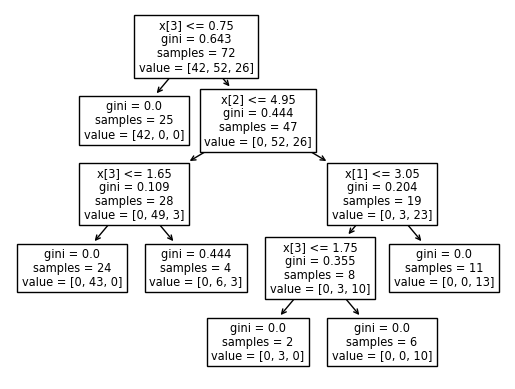

In [7]:
# si yo quisiera ver sólo un árbol
#no se puede imprimir todo el árbol aleatorio
from sklearn import tree
tree.plot_tree(modelo.estimators_[0]) 

El modelo sobre ajustó a los datos. 

In [8]:
#Buscar un número bueno de árboles a usar
#ya vimos que con 100 árboles el modelo sobre ajusta, vamos entrenando el modelo con diferente número de árboles
ntrees = np.arange(1,20,1) # hasta 20 árboles
R2_s = np.zeros(len(ntrees))
for n in range(len(ntrees)):
    model = RandomForestClassifier(n_estimators=ntrees[n],
                               criterion='gini',
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
    model = model.fit(X_train,y_train)
    R2_s[n] = model.score(X_train,y_train)

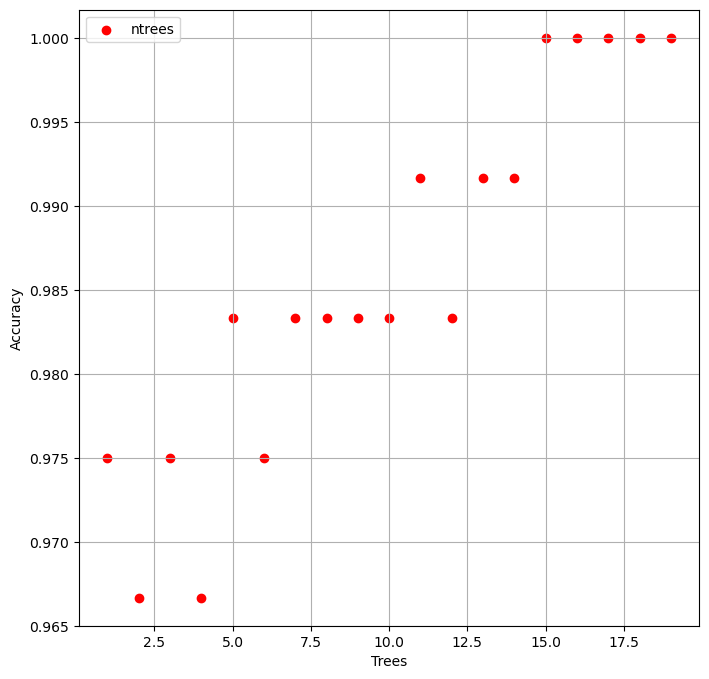

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(ntrees,R2_s,c='r',label='ntrees')
plt.ylabel('Accuracy')
plt.xlabel('Trees')
plt.grid()
plt.legend()
plt.show()

In [10]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(criterion='gini',
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 8),
                                'min_samples_split': range(5, 10, 2),
                                'n_estimators': range(2,5,1)}, 
                  cv=10,
                  scoring='accuracy')

gs.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(min_samples_leaf=2,
                                              random_state=0),
             param_grid={'max_depth': range(1, 8),
                         'min_samples_split': range(5, 10, 2),
                         'n_estimators': range(2, 5)},
             scoring='accuracy')

In [11]:
#imprimir hiperparámetros óptimos
print(gs.best_params_)

{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 2}


In [12]:
#crear modelo usando parámetros óptimos
new_model = RandomForestClassifier(n_estimators=2,
                               criterion='gini',
                               max_depth=2,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
new_model.fit(X_train, y_train)

C:\Users\galle\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=2, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=2, random_state=0)

In [13]:
# Evaluacion del modelo
yhat = new_model.predict(X_test)
accu = accuracy_score(y_test,yhat)
prec = precision_score(y_test,yhat,average='weighted')
reca = recall_score(y_test,yhat,average='weighted')
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 0.967	 0.969	 0.967


In [14]:
#importancia de las variables
import pandas as pd
feature_imp = pd.Series(new_model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.820882
petal length (cm)    0.179118
sepal length (cm)    0.000000
sepal width (cm)     0.000000
dtype: float64

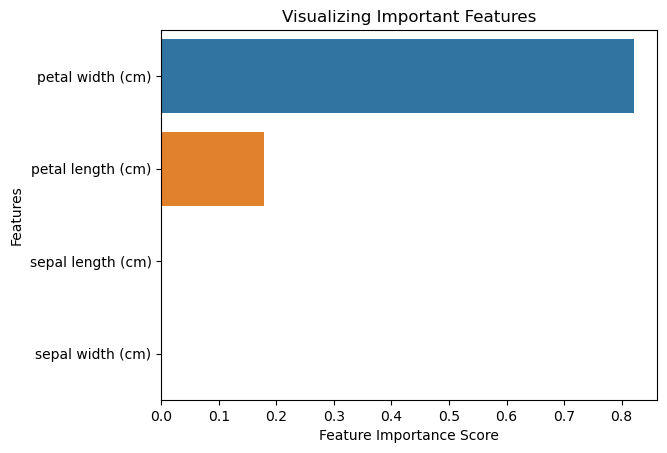

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

**Ventajas**

- Son muy buenos generalizando
- Protejen en contra del sobreajuste (overfitting) gracias a la construcción del bootstrapping 
- También reducen la varianza y por lo tanto mejoran la precisión del modelo
- Funcionan muy bien con variables categóricas y variables continuas
- No se requiere escalamiento previo de variables 
- Manejan muy bien el hecho de que haya datos nulos
- Son modelos robustos ante valores atípicos (outliers)
- Son algoritmos muy estables, cuando hay datos nuevos, el algoritmo no se ve muy afectado. Ya que este nuevo dato puede afectar a un árbol individual, pero es difícil que impacte a todos los árboles. 

**Desventajas**

- Complejidad. Los bosques aleatorios crean muchos árboles y combina sus resultados. Requiere mucho poder computacional y recursos 
- Periodos de entrenamiento largos. Requieren más tiempo de entrenamiento. 